<a href="https://colab.research.google.com/github/rafael-lima-rodrigues/curso_ia/blob/main/Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
import seaborn as sns


(32, 12)

In [ ]:

base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [ ]:
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
base = base.drop(['Unnamed: 0'], axis = 1)

<Axes: >

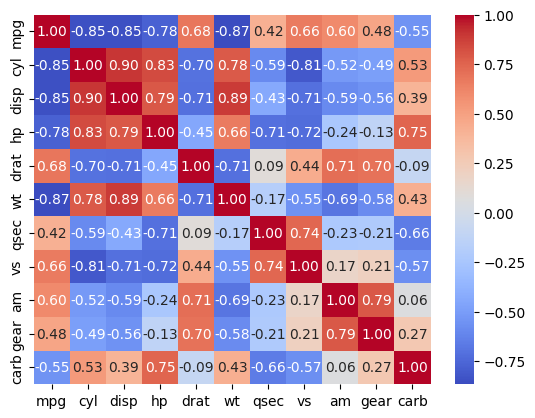

In [ ]:
corr = base.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

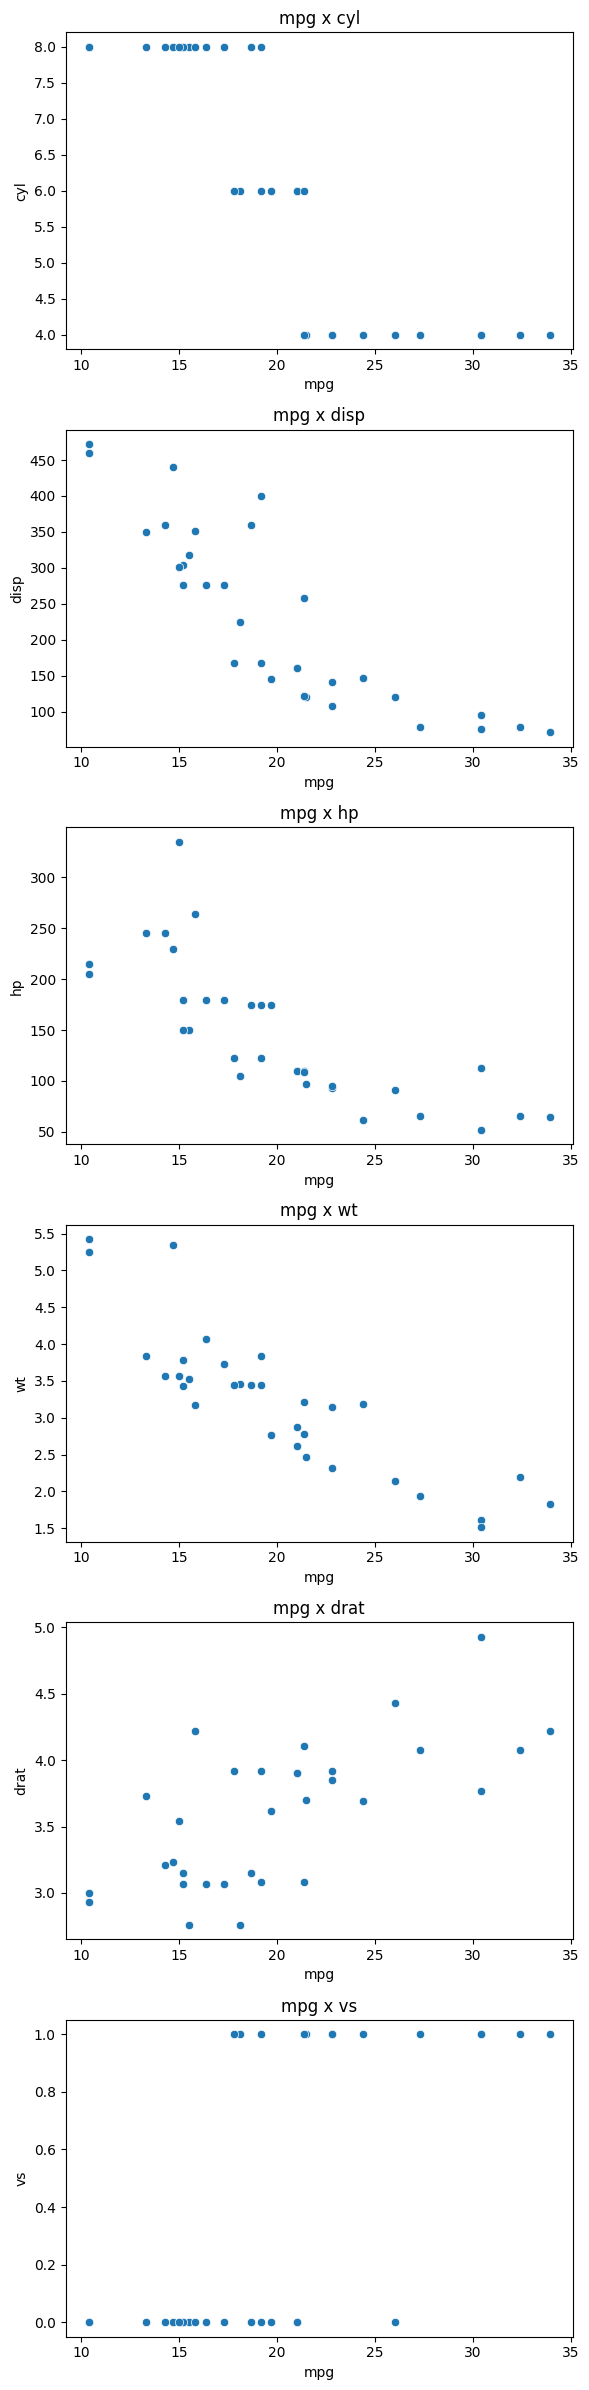

In [ ]:
column_pairs = [
    ('mpg', 'cyl'),
    ('mpg', 'disp'),
    ('mpg', 'hp'),
    ('mpg', 'wt'),
    ('mpg', 'drat'),
    ('mpg', 'vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6,4 * n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(x=x_col, y=y_col, data=base, ax=axes[i])
    axes[i].set_title(f'{x_col} x {y_col}')

plt.tight_layout()
plt.show()

In [ ]:
#aic 156.6 bic 162.5
#modelo = sm.ols(formula = 'mpg ~ wt + disp + hp ', data = base)
#aic 165.1 bic 169.5
#modelo = sm.ols(formula = 'mpg ~ disp + cyl ', data = base)
#aic 179.1 bic 183.5
modelo = sm.ols(formula = 'mpg ~ drat + vs ', data = base)

modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           5.82e-07
Time:                        17:04:43   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.7

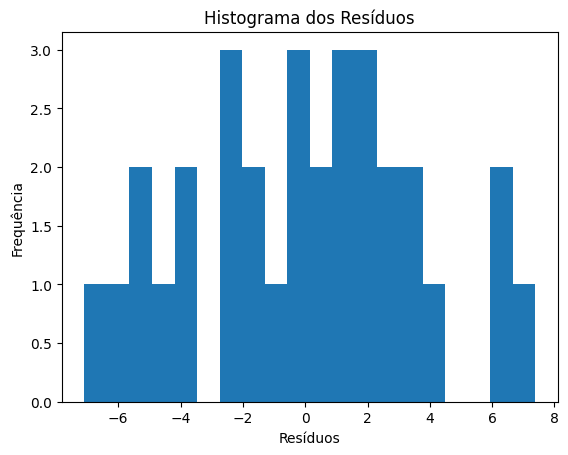

In [ ]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

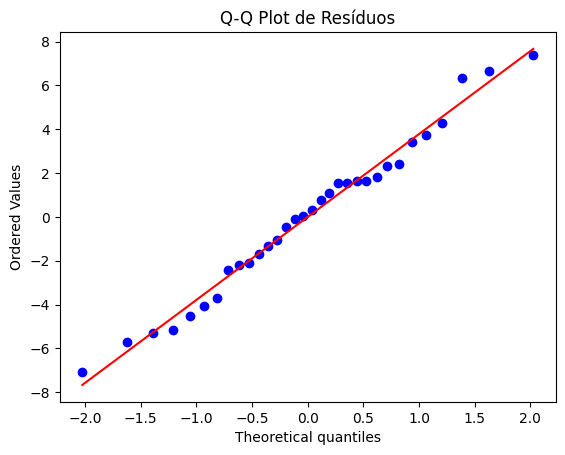

In [ ]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de Resíduos')
plt.show()

In [ ]:
# h0 - dados estão normalmente distribuidos
# p <= 0.05 rejeito a hipostese nula, (não estao normalmente distribuidos)
# p > 0.05 não é possivel rejeitar a h0
stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk: {stat:.3f}, p-value: {pval:.3f}')

Shapiro-Wilk: 0.981, p-value: 0.822
